In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19-global-forecasting-week-2/train.csv
/kaggle/input/covid19-global-forecasting-week-2/submission.csv
/kaggle/input/covid19-global-forecasting-week-2/test.csv
/kaggle/input/covid19-global-forecasting-week-1/train.csv
/kaggle/input/covid19-global-forecasting-week-1/submission.csv
/kaggle/input/covid19-global-forecasting-week-1/test.csv


In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
train=pd.read_csv(r"../input/covid19-global-forecasting-week-2/train.csv")
test=pd.read_csv(r"../input/covid19-global-forecasting-week-2/test.csv")

In [80]:
train.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [81]:
test.head()

,ForecastId,Province_State,Country_Region,Date
0,1,NaN,Afghanistan,2020-03-19
1,2,NaN,Afghanistan,2020-03-20
2,3,NaN,Afghanistan,2020-03-21
3,4,NaN,Afghanistan,2020-03-22
4,5,NaN,Afghanistan,2020-03-23


In [82]:
train.shape

(19698, 6)

In [83]:
train.isnull().sum()

Id                    0
Province_State    11323
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

In [84]:
#Confirmed Cases by Country
df=train.fillna('NA').groupby(['Country_Region','Province_State','Date'])['ConfirmedCases'].sum()\
.groupby(['Country_Region','Province_State',]).max().sort_values()\
.groupby(['Country_Region']).sum().sort_values(ascending =False)
data10=pd.DataFrame(df).head(10)
data10

,ConfirmedCases
Country_Region,
US,121326.0
Italy,92472.0
China,82000.0
Spain,73235.0
Germany,57695.0
France,38105.0
Iran,35408.0
United Kingdom,17304.0
Switzerland,14076.0


In [85]:
import itertools
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.simplefilter('ignore')

In [86]:
fig=px.bar(data10,x=data10.index,y='ConfirmedCases',labels={'x':'Country'},
          color="ConfirmedCases",color_continuous_scale=px.colors.sequential.Brwnyl)
fig.update_layout(title_text='Con firmed Cases by Country')
fig.show()

In [87]:
df_by_date=pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())
fig=px.bar(df_by_date.loc[(df_by_date['Country_Region']=='US') & (df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending =False),
          x='Date',y='ConfirmedCases',color="ConfirmedCases",color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed Cases per date in United States')
fig.show()

In [88]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Italy') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed cases per day in Italy')
fig.show()

In [89]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'China') &(df_by_date.Date >= '2020-01-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed cases per day in China')
fig.show()

In [90]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Spain') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed  cases per day in Spain')
fig.show()

In [91]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'Germany') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed  cases per day in Germany')
fig.show()

In [92]:
df_by_date = pd.DataFrame(train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum().sort_values().reset_index())

fig = px.bar(df_by_date.loc[(df_by_date['Country_Region'] == 'India') &(df_by_date.Date >= '2020-03-01')].sort_values('ConfirmedCases',ascending = False), 
             x='Date', y='ConfirmedCases', color="ConfirmedCases", color_continuous_scale=px.colors.sequential.BuGn)
fig.update_layout(title_text='Confirmed  cases per day in India')
fig.show()

In [93]:
df=train.groupby(['Date','Country_Region']).agg('sum').reset_index()
df.head()

,Date,Country_Region,Id,ConfirmedCases,Fatalities
0,2020-01-22,Afghanistan,1,0.0,0.0
1,2020-01-22,Albania,101,0.0,0.0
2,2020-01-22,Algeria,201,0.0,0.0
3,2020-01-22,Andorra,301,0.0,0.0
4,2020-01-22,Angola,401,0.0,0.0


In [100]:
def pltCountry_Cases(ConfirmedCases,*argv):
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv:
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['ConfirmedCases'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Number of Cases')

In [101]:
def pltCountry_Fatalities(Fatalities,*argv):
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv
    for a in argv:
        country=df.loc[(df['Country_Region']==a)]
        plt.plot(country['Date'],country['Fatalities'],linewidth=3)
        plt.xticks(rotation=40)
        plt.legend(labels)
        ax.set(title='Number of fatalities')

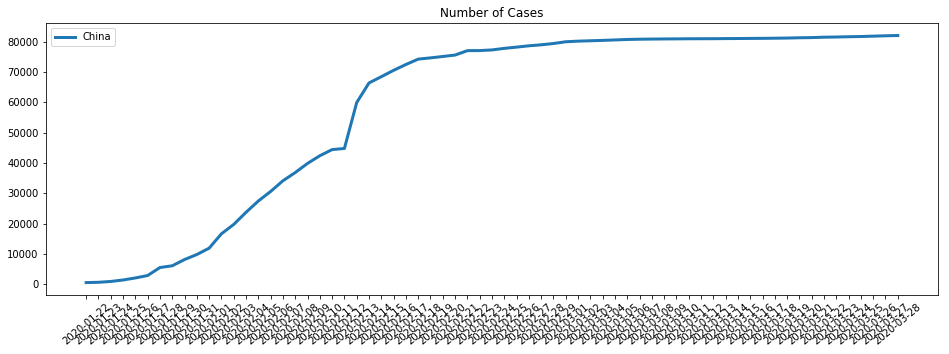

In [103]:
pltCountry_Cases('ConfirmedCases','China')

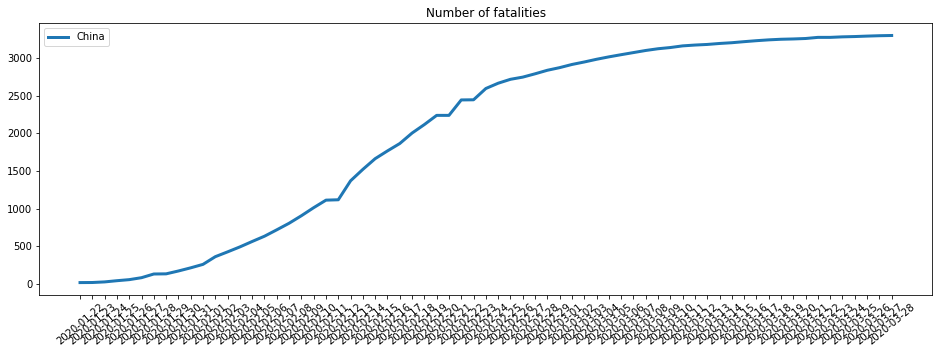

In [106]:
pltCountry_Fatalities('Fatalities','China')

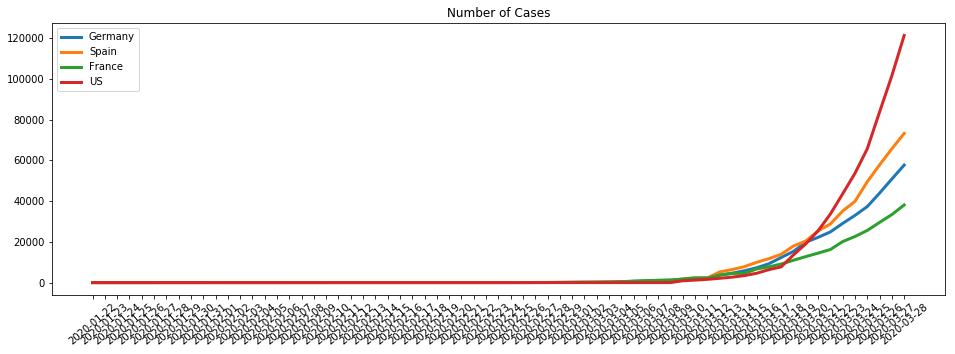

In [105]:
pltCountry_Cases('ConfirmedCases', 'Germany','Spain','France','US')

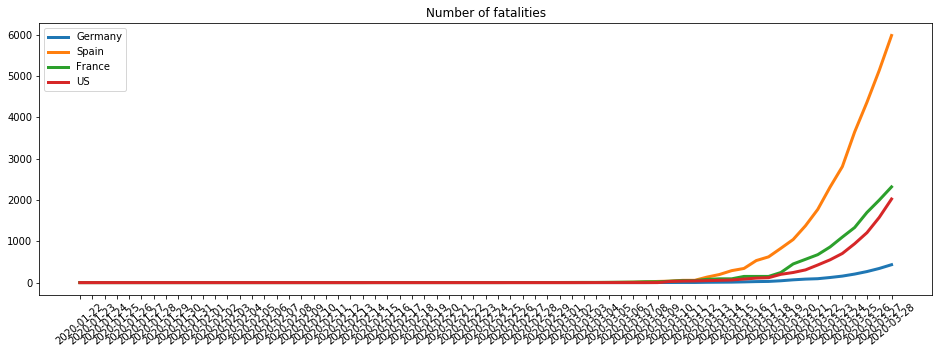

In [107]:
pltCountry_Fatalities('Fatilities','Germany','Spain','France','US')

In [108]:
test['Date'] = pd.to_datetime(test['Date'])
train['Date'] = pd.to_datetime(train['Date'])

In [109]:


case='ConfirmedCases'
def timeCompare(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['Date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of cases in %d days difference '%time ,ylabel='Number of %s cases'%case )



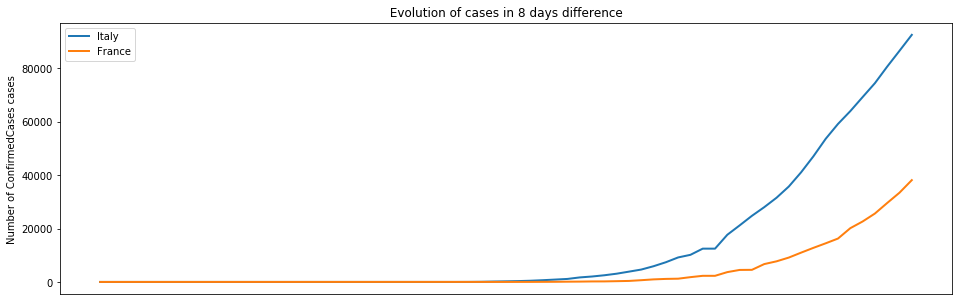

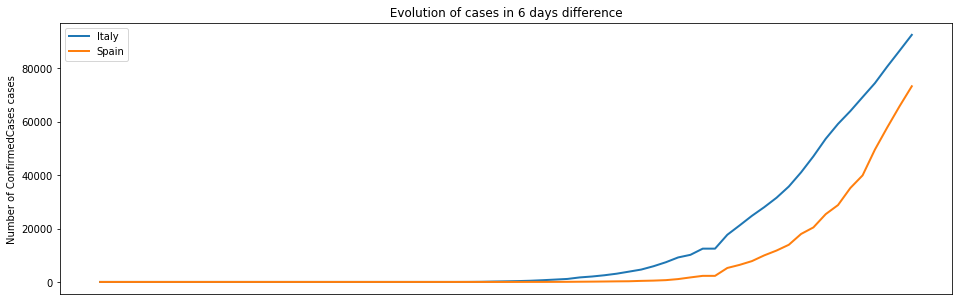

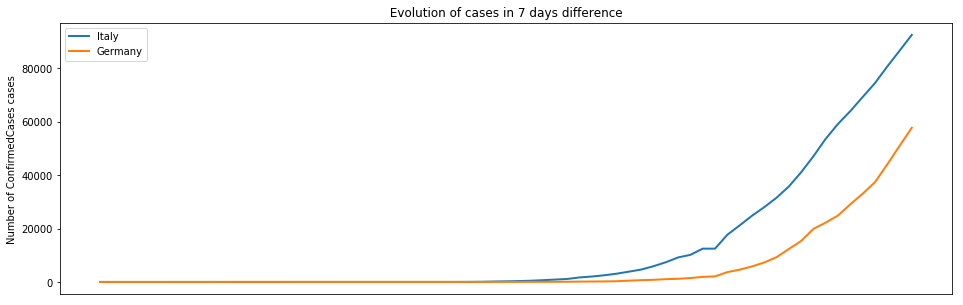

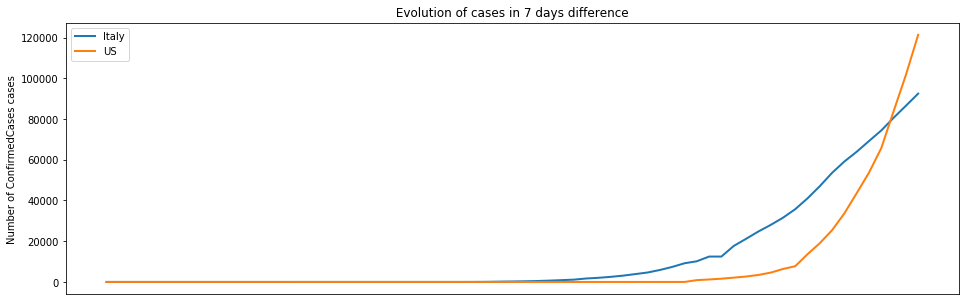

In [110]:
timeCompare(8,'Italy','France')
timeCompare(6,'Italy','Spain')
timeCompare(7,'Italy','Germany')
timeCompare(7,'Italy','US')

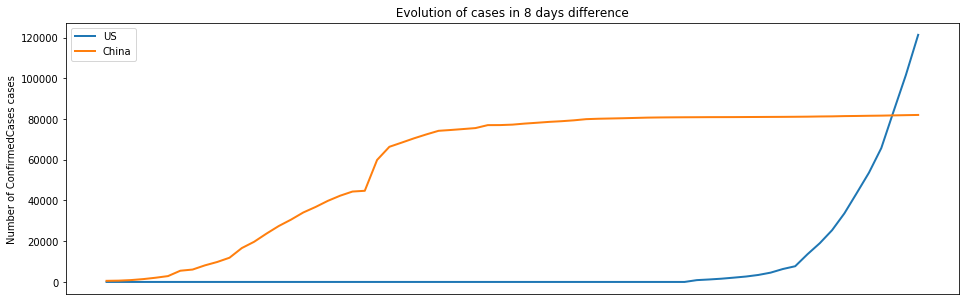

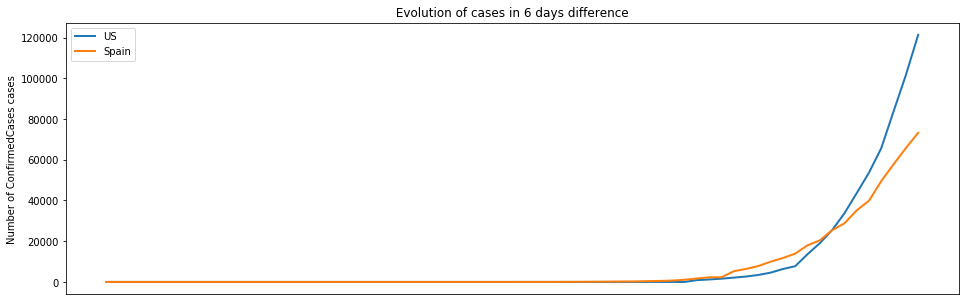

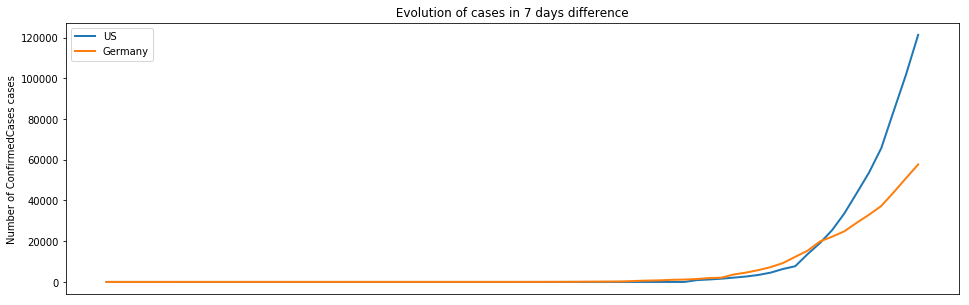

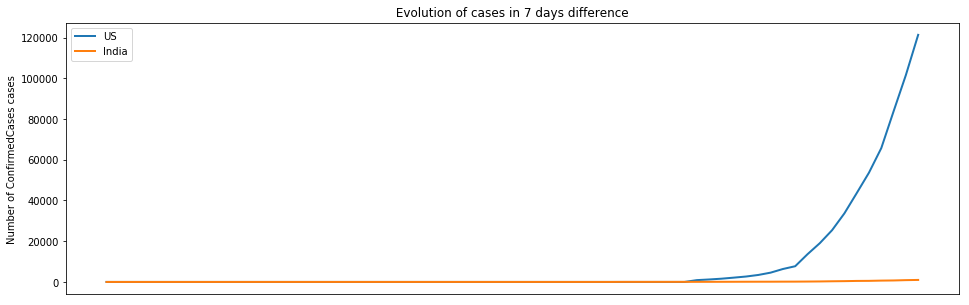

In [111]:
timeCompare(8,'US','China')
timeCompare(6,'US','Spain')
timeCompare(7,'US','Germany')
timeCompare(7,'US','India')

In [112]:
case='Fatalities'
def timeCompare_f(time,*argv):
    Coun1=argv[0]
    Coun2=argv[1]
    f,ax=plt.subplots(figsize=(16,5))
    labels=argv  
    country=df.loc[(df['Country_Region']==Coun1)]
    plt.plot(country['Date'],country[case],linewidth=2)
    plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of actual cases',ylabel='Number of cases' )

    country2=df.loc[df['Country_Region']==Coun2]
    #country2['Date']=country2['Date']-datetime.timedelta(days=time)
    plt.plot(country2['Date'],country2[case],linewidth=2)
    #plt.xticks([])
    plt.legend(labels)
    ax.set(title=' Evolution of Fatalities in %d days difference '%time ,ylabel='Number of %s cases'%case )

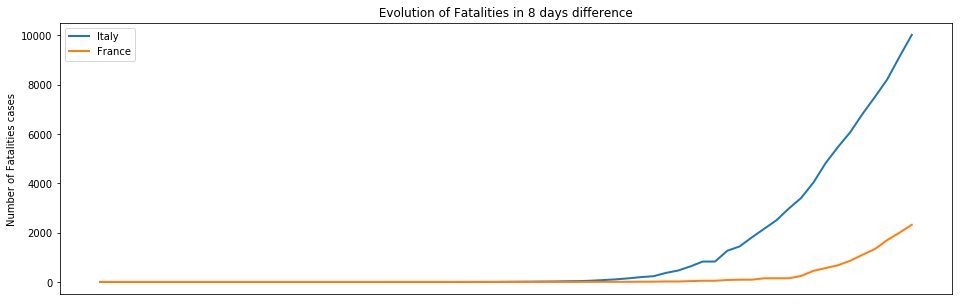

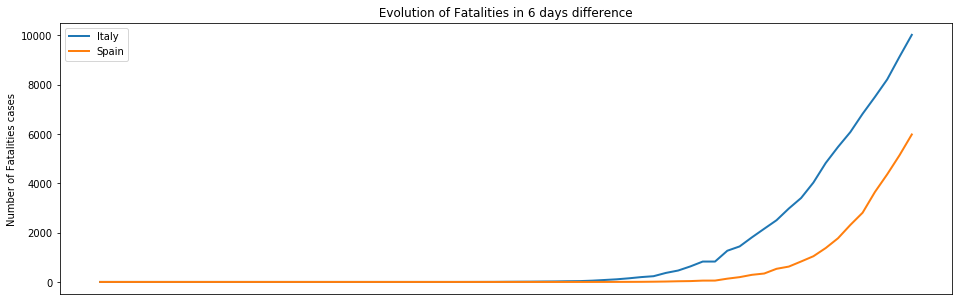

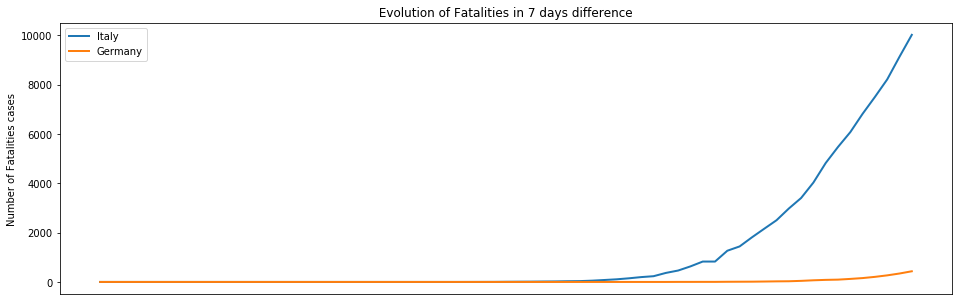

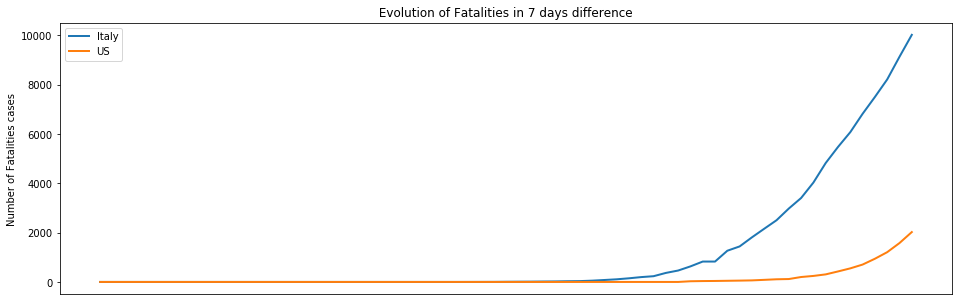

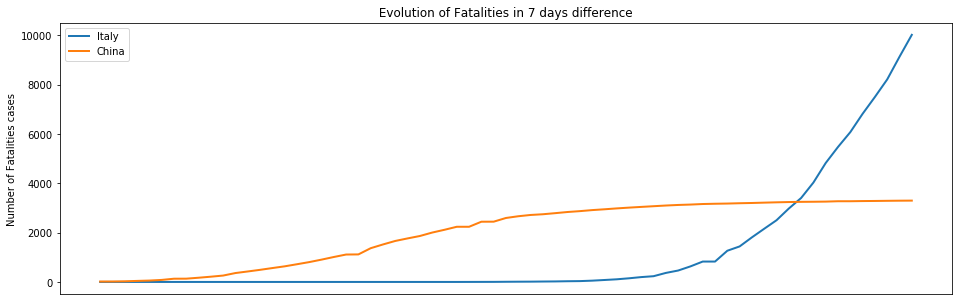

In [114]:
timeCompare_f(8,'Italy','France')
timeCompare_f(6,'Italy','Spain')
timeCompare_f(7,'Italy','Germany')
timeCompare_f(7,'Italy','US')
timeCompare_f(7,'Italy','China')

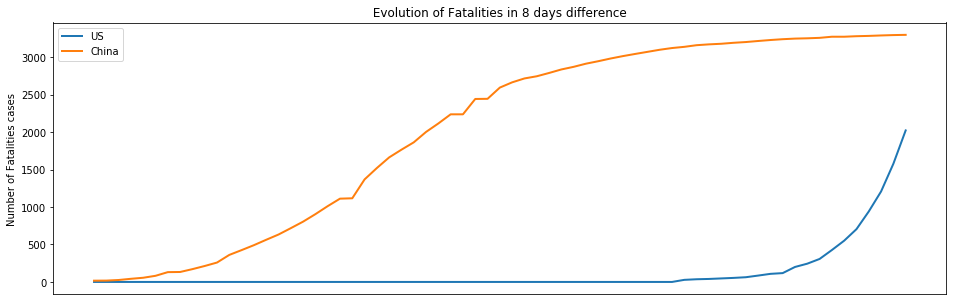

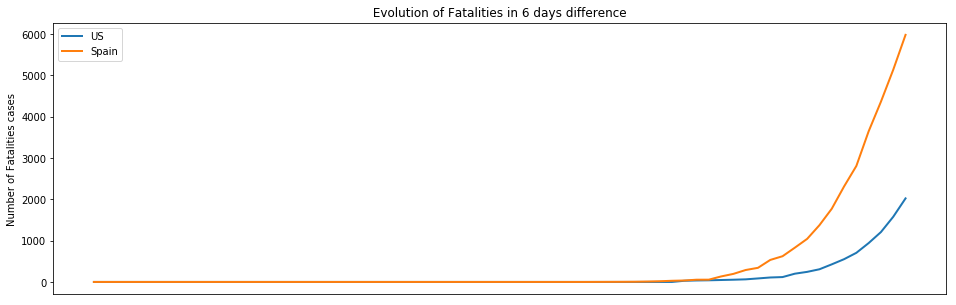

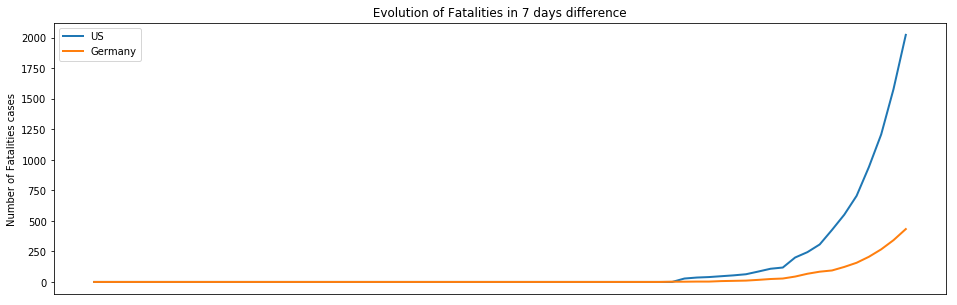

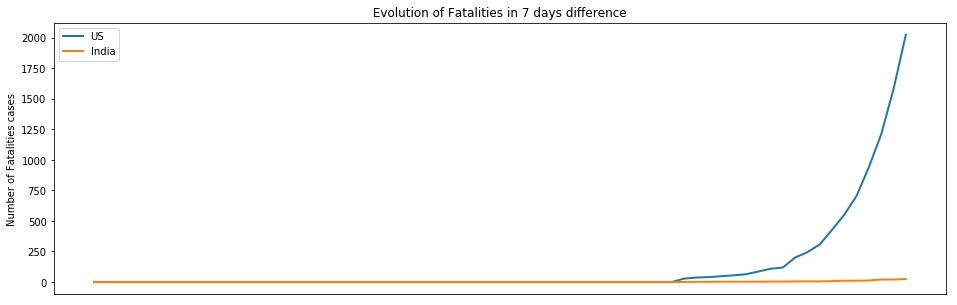

In [115]:
timeCompare_f(8,'US','China')
timeCompare_f(6,'US','Spain')
timeCompare_f(7,'US','Germany')
timeCompare_f(7,'US','India')

In [117]:
sns.set(palette = 'Set1',style='darkgrid')
#Function for making a time serie on a designated country and plotting the rolled mean and standard 
def roll(country,case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    return (ts.rolling(window=4,center=False).mean().dropna())


def rollPlot(country, case='ConfirmedCases'):
    ts=df.loc[(df['Country_Region']==country)]  
    ts=ts[['Date',case]]
    ts=ts.set_index('Date')
    ts.astype('int64')
    a=len(ts.loc[(ts['ConfirmedCases']>=10)])
    ts=ts[-a:]
    plt.figure(figsize=(16,6))
    plt.plot(ts.rolling(window=7,center=False).mean().dropna(),label='Rolling Mean')
    plt.plot(ts[case])
    plt.plot(ts.rolling(window=7,center=False).std(),label='Rolling std')
    plt.legend()
    plt.title('Cases distribution in %s with rolling mean and standard' %country)
    plt.xticks([])

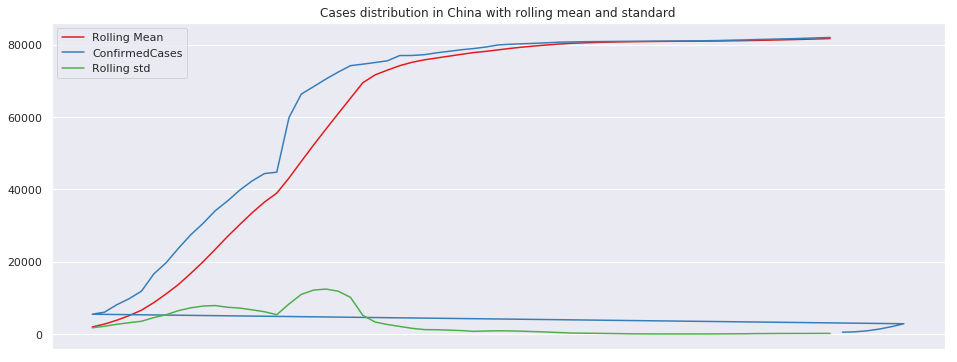

In [118]:
tsC1=roll('China')
rollPlot('China')

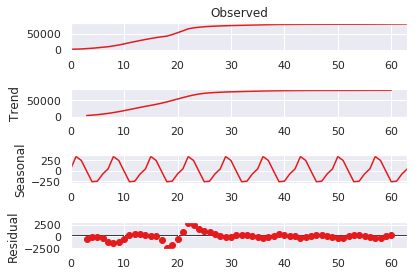

In [119]:
#Decomposing the ts to find its properties
fig=sm.tsa.seasonal_decompose(tsC1.values,freq=7).plot()

In [121]:


#Function to check the stationarity of the time serie using Dickey fuller test
def stationarity(ts):
    print('Results of Dickey-Fuller Test:')
    test = adfuller(ts, autolag='AIC')
    results = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for i,val in test[4].items():
        results['Critical Value (%s)'%i] = val
    print (results)

#For China
tsC=tsC1['ConfirmedCases'].values
stationarity(tsC)



Results of Dickey-Fuller Test:
Test Statistic                 -3.384060
p-value                         0.011514
#Lags Used                      5.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


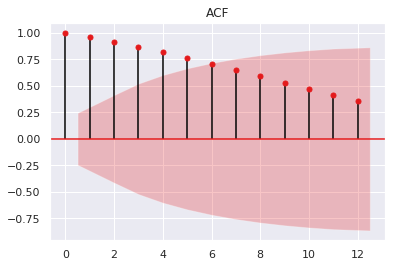

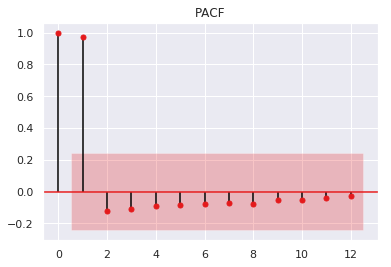

In [122]:
def corr(ts):
    plot_acf(ts,lags=12,title="ACF")
    plot_pacf(ts,lags=12,title="PACF")
    

#For China
corr(tsC1)

In [123]:
train = train.set_index(['Date'])
test = test.set_index(['Date'])

In [124]:
def create_features(df,label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['Date'] = df.index
    df['hour'] = df['Date'].dt.hour
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
   
    return X

In [126]:
train_features=pd.DataFrame(create_features(train))
test_features=pd.DataFrame(create_features(test))
features_and_target_train = pd.concat([train,train_features], axis=1)
features_and_target_test = pd.concat([test,test_features], axis=1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df
features_and_target_train= FunLabelEncoder(features_and_target_train)

In [127]:
x_train= features_and_target_train[['Country_Region','month', 'dayofyear', 'dayofmonth' , 'weekofyear']]
y1 = features_and_target_train[['ConfirmedCases']]
y2 =features_and_target_train[['Fatalities']]
x_test = features_and_target_test[['Country_Region', 'month', 'dayofyear', 'dayofmonth' , 'weekofyear']]

In [ ]:
#Mean absolute percentage error
def mape(y1, y_pred): 
    y1, y_pred = np.array(y1), np.array(y_pred)
    return np.mean(np.abs((y1 - y_pred) / y1)) * 100

def split(ts):
    #splitting 85%/15% because of little amount of data
    size = int(len(ts) * 0.85)
    train= ts[:size]
    test = ts[size:]
    return(train,test)


#Arima modeling for ts
def arima(ts,test):
    p=d=q=range(0,6)
    a=99999
    pdq=list(itertools.product(p,d,q))
    
    #Determining the best parameters
    for var in pdq:
        try:
            model = ARIMA(ts, order=var)
            result = model.fit()

            if (result.aic<=a) :
                a=result.aic
                param=var
        except:
            continue
            
    #Modeling
    model = ARIMA(ts, order=param)
    result = model.fit()
    result.plot_predict(start=int(len(ts) * 0.7), end=int(len(ts) * 1.2))
    pred=result.forecast(steps=len(test))[0]
    #Plotting results
    f,ax=plt.subplots()
    plt.plot(pred,c='green', label= 'predictions')
    plt.plot(test, c='red',label='real values')
    plt.legend()
    plt.title('True vs predicted values')
    #Printing the error metrics
    print(result.summary())        
    
    print('\nMean absolute percentage error: %f'%mape(test,pred))
    return (pred)



train,test=split(tsC)
pred=arima(train,test)